In [4]:
!pip install numpy==1.24.4 --force-reinstall --no-cache-dir


     ---------------------------------------- 0.0/14.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/14.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/14.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/14.9 MB 81.9 kB/s eta 0:03:02
     --------------------------------------- 0.0/14.9 MB 179.6 kB/s eta 0:01:23
     --------------------------------------- 0.1/14.9 MB 175.0 kB/s eta 0:01:25
     --------------------------------------- 0.1/14.9 MB 218.6 kB/s eta 0:01:08
     --------------------------------------- 0.1/14.9 MB 281.0 kB/s eta 0:00:53
     --------------------------------------- 0.1/14.9 MB 342.3 kB/s eta 0:00:44
      -------------------------------------- 0.2/14.9 MB 445.2 kB/s eta 0:00:33
      -------------------------------------- 0.3/14.9 MB 592.4 kB/s eta 0:00:25
      -------------------------------------- 0.4/14.9 MB 694.2 kB/s eta 0:00:21
     - ------------------------------------- 0.5/14.9 MB 868.1 k

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\kriti\\anaconda3\\Lib\\site-packages\\~-mpy\\.libs\\libopenblas64__v0.3.21-gcc_10_3_0.dll'
Consider using the `--user` option or check the permissions.



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

In [3]:
trip_data_path = (r"C:\Users\kriti\kriti python\df_trips_202401.csv") 
trips_df = pd.read_csv(trip_data_path)

In [4]:
trips_df.head()

,PROVIDER_ID,PROVIDER_NAME,DEVICE_ID,VEHICLE_ID,VEHICLE_TYPE,PROPULSION_TYPE,TRIP_ID,TRIP_DURATION,TRIP_DISTANCE,ROUTE,...,START_TIME_RAW,END_TIME_RAW,PUBLICATION_TIME_RAW,PARKING_VERIFICATION_URL,STANDARD_COST,ACTUAL_COST,CURRENCY,GEOM_POINTS,ID,RUN_DATE
0,2411d395-04f2-47c9-ab66-d09e9e3c3251,Bird,2a22a82d-df4a-4eb8-8342-acd8050af025,69Z7M,scooter,electric,37ea4e27-18d8-411c-8f1e-b540f8488720,112,152,"{""type"":""FeatureCollection"",""features"":[{""type...",...,1704241804583,1704241917451,NaN,NaN,NaN,NaN,NaN,"{\n ""geometries"": [\n {\n ""coordinate...",3474224,NaN
1,2411d395-04f2-47c9-ab66-d09e9e3c3251,Bird,a575d1d7-e905-4cf2-8da6-e513ab93c3ce,GVMTC,scooter,electric,60036b60-a949-4740-9128-1cc363f80463,189,603,"{""type"":""FeatureCollection"",""features"":[{""type...",...,1704242618268,1704242807575,NaN,NaN,NaN,NaN,NaN,"{\n ""geometries"": [\n {\n ""coordinate...",3474225,NaN
2,2411d395-04f2-47c9-ab66-d09e9e3c3251,Bird,7b7ff31f-91e2-4c67-abef-d32ec2fa7303,6T43Q,scooter,electric,6fc11783-0bdf-42f5-8f46-130711abdd40,135,365,"{""type"":""FeatureCollection"",""features"":[{""type...",...,1704243898351,1704244033714,NaN,NaN,NaN,NaN,NaN,"{\n ""geometries"": [\n {\n ""coordinate...",3474226,NaN
3,2411d395-04f2-47c9-ab66-d09e9e3c3251,Bird,175f4435-1766-49d0-9a82-b4561eda1eeb,14QTX,scooter,electric,4c96f424-7721-4151-b55a-0db394f6ace7,1391,2484,"{""type"":""FeatureCollection"",""features"":[{""type...",...,1704242801608,1704244193380,NaN,NaN,NaN,NaN,NaN,"{\n ""geometries"": [\n {\n ""coordinate...",3474227,NaN
4,2411d395-04f2-47c9-ab66-d09e9e3c3251,Bird,2b952779-6489-46b5-8926-2b23a2fc57b8,9VYK2,scooter,electric,7a1e3086-3477-40e1-b5c5-def24d263c7c,1361,2492,"{""type"":""FeatureCollection"",""features"":[{""type...",...,1704242836780,1704244198591,NaN,NaN,NaN,NaN,NaN,"{\n ""geometries"": [\n {\n ""coordinate...",3474228,NaN


In [5]:
print("Columns in the dataset:")
print(trips_df.columns)

Columns in the dataset:
Index(['PROVIDER_ID', 'PROVIDER_NAME', 'DEVICE_ID', 'VEHICLE_ID',
       'VEHICLE_TYPE', 'PROPULSION_TYPE', 'TRIP_ID', 'TRIP_DURATION',
       'TRIP_DISTANCE', 'ROUTE', 'ACCURACY', 'START_TIME', 'END_TIME',
       'PUBLICATION_TIME', 'START_TIME_RAW', 'END_TIME_RAW',
       'PUBLICATION_TIME_RAW', 'PARKING_VERIFICATION_URL', 'STANDARD_COST',
       'ACTUAL_COST', 'CURRENCY', 'GEOM_POINTS', 'ID', 'RUN_DATE'],
      dtype='object')


In [6]:
columns_to_drop = [
    'PROVIDER_ID', 'DEVICE_ID', 'VEHICLE_ID', 'VEHICLE_TYPE', 'PROPULSION_TYPE',
    'TRIP_ID', 'ROUTE', 'ACCURACY',
    'START_TIME_RAW', 'END_TIME_RAW', 'END_TIME', 'PUBLICATION_TIME', 'PUBLICATION_TIME_RAW',
    'PARKING_VERIFICATION_URL', 'STANDARD_COST', 'ACTUAL_COST', 'CURRENCY',
    'GEOM_POINTS', 'ID', 'RUN_DATE'
]

# Drop unneeded columns
trips_df = trips_df.drop(columns=columns_to_drop, errors='ignore')


In [7]:
# Convert START_TIME to datetime
trips_df['START_TIME'] = pd.to_datetime(trips_df['START_TIME'], errors='coerce')

# Extract HOUR and DAY_TYPE
trips_df['HOUR'] = trips_df['START_TIME'].dt.hour
trips_df['DAY_OF_WEEK'] = trips_df['START_TIME'].dt.dayofweek
trips_df['DAY_TYPE'] = trips_df['DAY_OF_WEEK'].apply(lambda x: 'Weekday' if x < 5 else 'Weekend')

# Convert duration from seconds to minutes
trips_df['DURATION_MIN'] = trips_df['TRIP_DURATION'] / 60

# Convert distance from meters to miles
trips_df['DISTANCE_MILES'] = trips_df['TRIP_DISTANCE'] / 1609.34

# Calculate speed in miles per hour (MPH)
# Speed = (distance in miles) / (duration in hours) = miles / (minutes / 60)
trips_df['SPEED_MPH'] = trips_df['DISTANCE_MILES'] / (trips_df['DURATION_MIN'] / 60)


In [8]:
# Grouping average metrics for plotting
duration_grouped = trips_df.groupby(['DAY_TYPE', 'HOUR', 'PROVIDER_NAME'])['DURATION_MIN'].mean().reset_index()
distance_grouped = trips_df.groupby(['DAY_TYPE', 'HOUR', 'PROVIDER_NAME'])['DISTANCE_MILES'].mean().reset_index()
speed_grouped = trips_df.groupby(['DAY_TYPE', 'HOUR', 'PROVIDER_NAME'])['SPEED_MPH'].mean().reset_index()


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

def plot_metric(df, y_col, title, ylabel, day_type):
    plt.figure(figsize=(12, 6))
    sns.barplot(data=df[df['DAY_TYPE'] == day_type], x='HOUR', y=y_col, hue='PROVIDER_NAME')
    plt.title(f"{title} on {day_type}s")
    plt.xlabel("Hour")
    plt.ylabel(ylabel)
    plt.legend(title="Provider")
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()


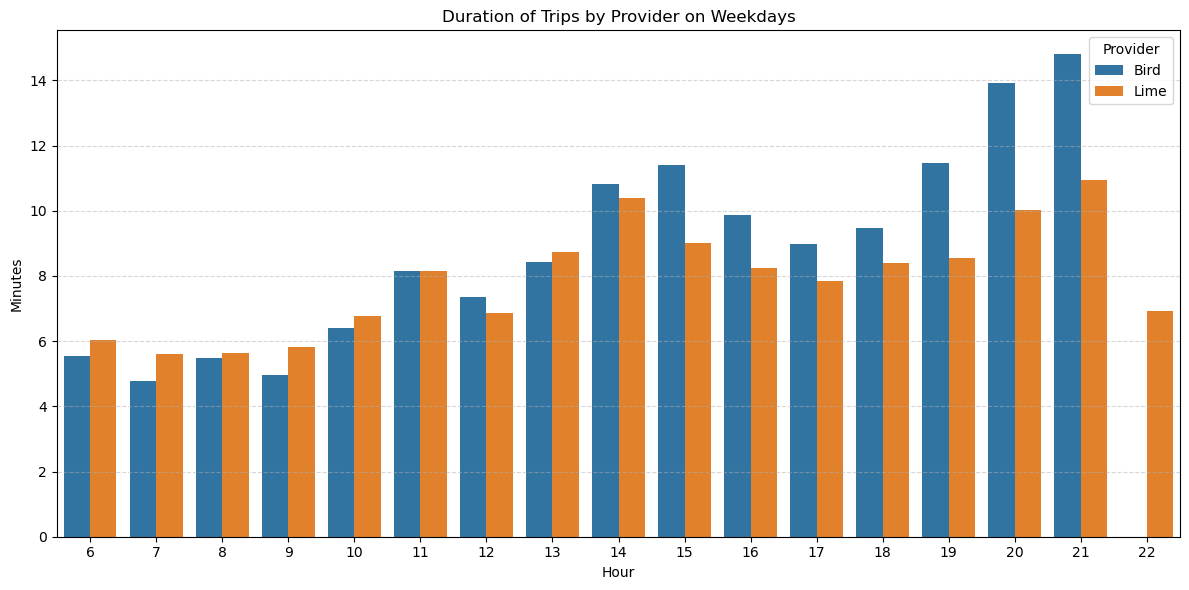

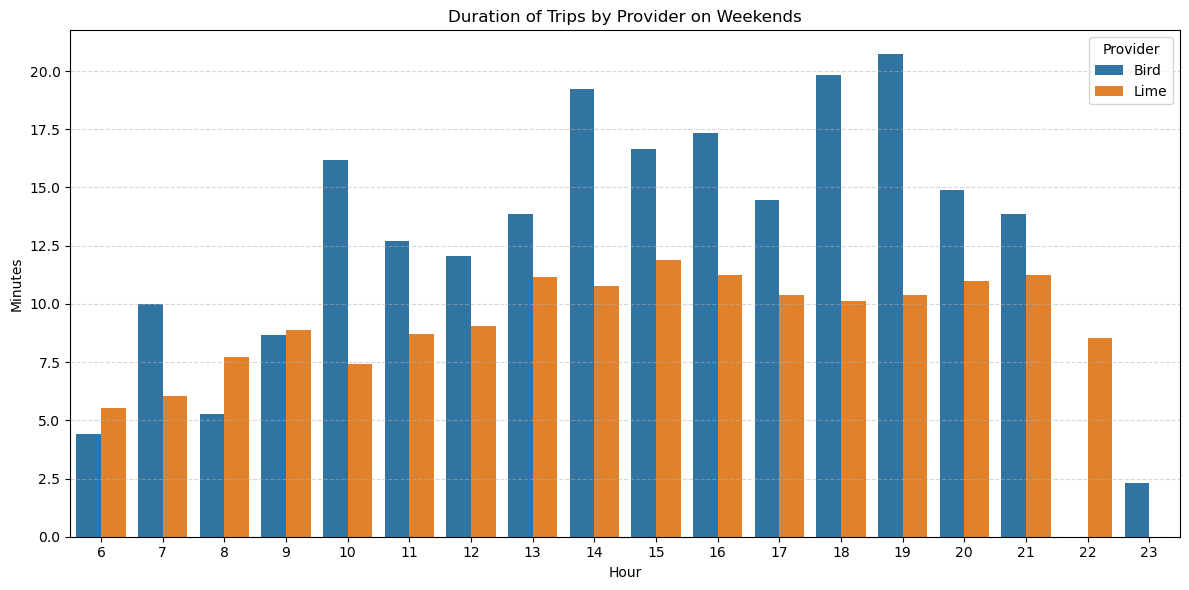

In [13]:
# Duration plots
plot_metric(duration_grouped, 'DURATION_MIN', "Duration of Trips by Provider", "Minutes", "Weekday")
plot_metric(duration_grouped, 'DURATION_MIN', "Duration of Trips by Provider", "Minutes", "Weekend")

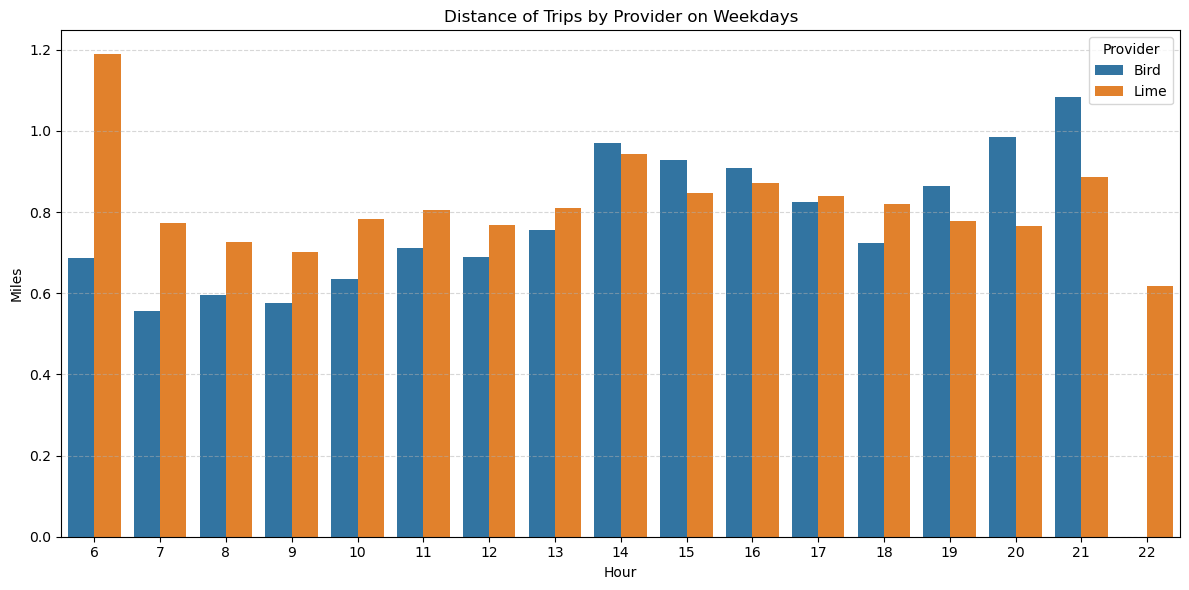

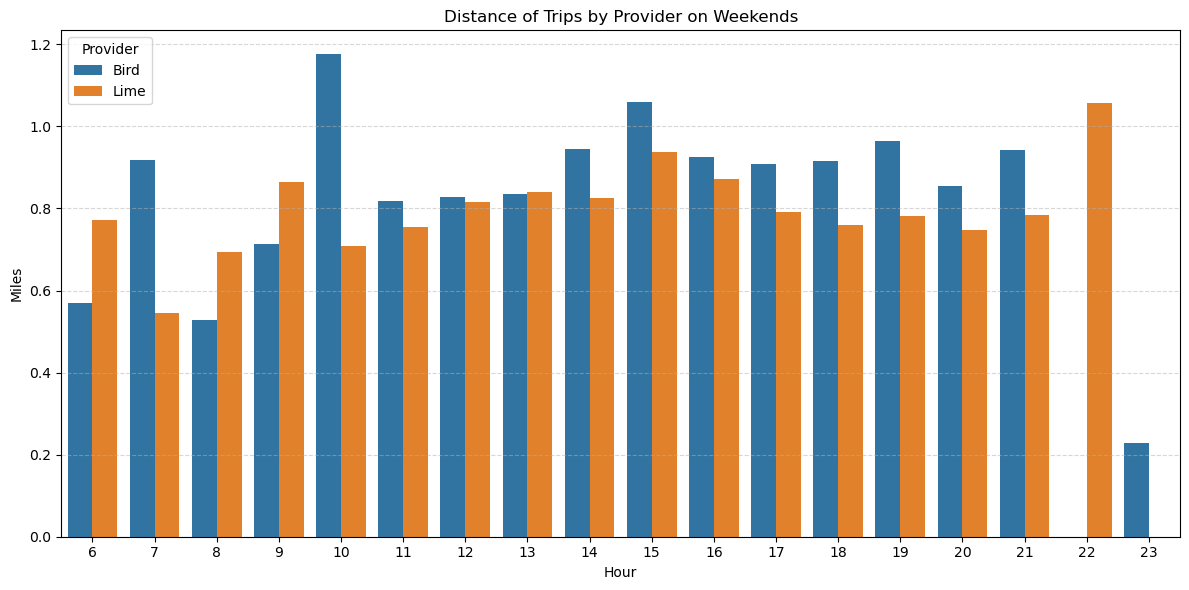

In [11]:
# Distance plots
plot_metric(distance_grouped, 'DISTANCE_MILES', "Distance of Trips by Provider", "Miles", "Weekday")
plot_metric(distance_grouped, 'DISTANCE_MILES', "Distance of Trips by Provider", "Miles", "Weekend")


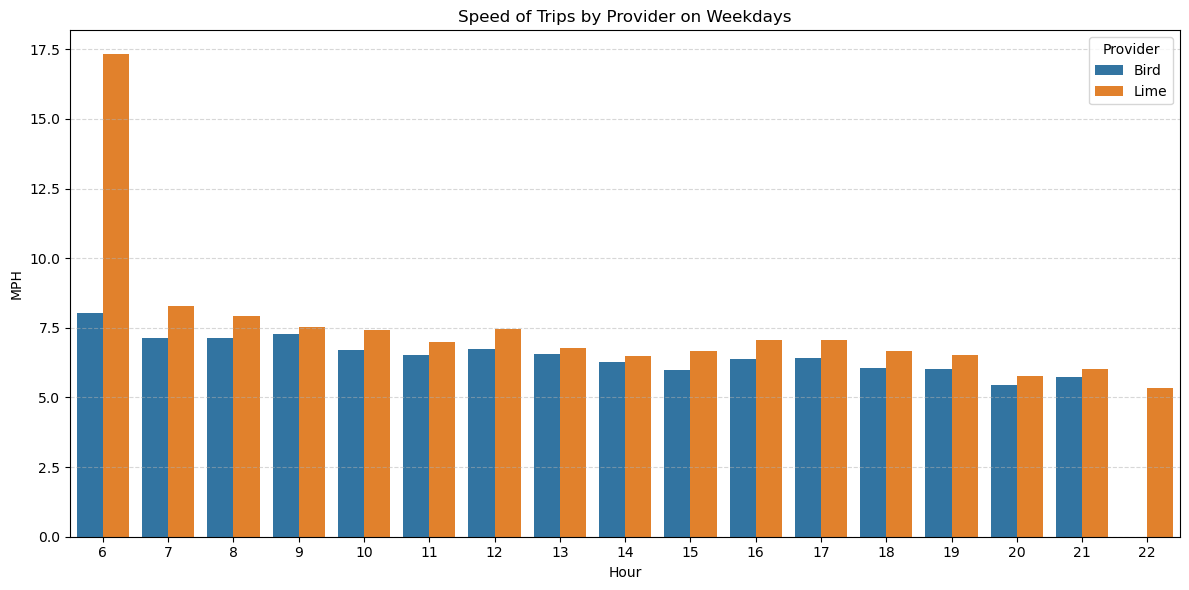

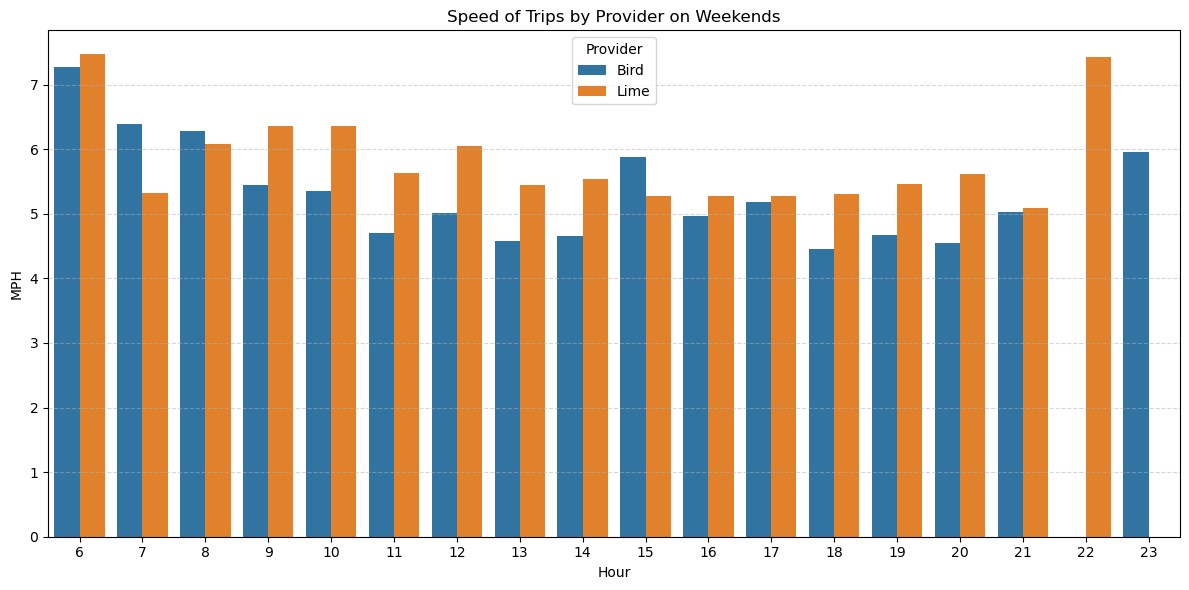

In [12]:
# Speed plots
plot_metric(speed_grouped, 'SPEED_MPH', "Speed of Trips by Provider", "MPH", "Weekday")
plot_metric(speed_grouped, 'SPEED_MPH', "Speed of Trips by Provider", "MPH", "Weekend")

In [10]:
.summary_table = trips_df.groupby(['PROVIDER_NAME', 'DAY_TYPE']).agg({
    'DISTANCE_MILES': 'mean',
    'DURATION_MIN': 'mean',
    'SPEED_MPH': 'mean'
}).round(2).unstack()

print("Summary Table:")
print(summary_table)


Summary Table:
              DISTANCE_MILES         DURATION_MIN         SPEED_MPH        
DAY_TYPE             Weekday Weekend      Weekday Weekend   Weekday Weekend
PROVIDER_NAME                                                              
Bird                    0.80    0.92         9.35   16.00      6.39    4.98
Lime                    0.82    0.81         8.14   10.43      7.10    5.49
